In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.vector_ar.vecm import coint_johansen
np.random.seed(22)
import sys

def loading_bar(progress, total, length=30):
    percent = int(100 * progress / total)
    filled = int(length * progress / total)
    bar = '█' * filled + '-' * (length - filled)
    sys.stdout.write(f'\rRunning Simulations: |{bar}| {percent}% --- {progress}/{total}')
    sys.stdout.flush()

# T_list = []
# num_series_list = []
# coint_frac_list = []
# num_of_rw_list = []
# SADF_list = []
# crit_95_list = []
# crit_99_list = []

In [2]:
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, 2)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, 2)) #constant
dict_val = {}

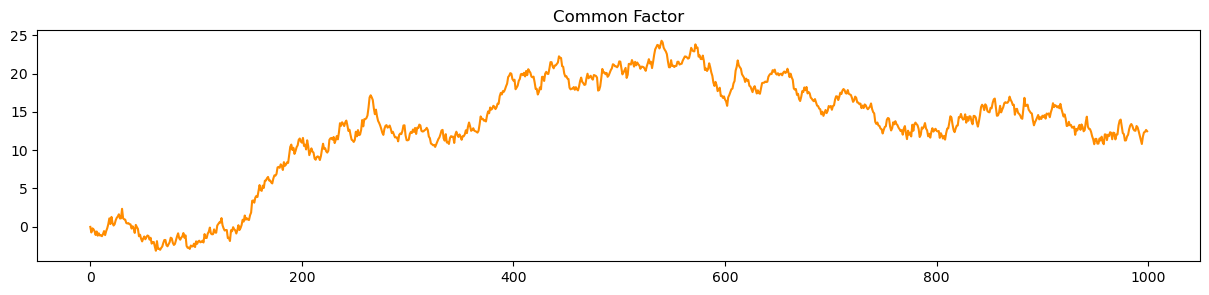

In [3]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

## N = 300

In [8]:
delta = 0.015

In [10]:
T = 300
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [12]:
num_series = 2
multipliers = np.array([1.2, 2.0])
num_of_rw = 0.6

In [14]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [17]:
# 1

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

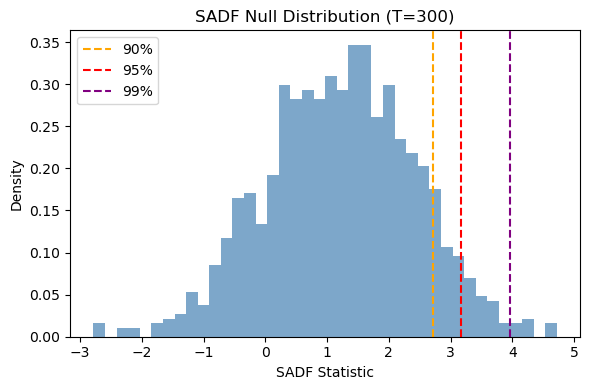

     Critical Value
90%        2.715386
95%        3.159493
99%        3.962334


Running Simulations: |██████████████████████████████| 100% --- 1000/1000

Mean SADF: 4.379
Median SADF: 3.954
Min SADF: -2.257
Max SADF: 12.566
Standard deviation: 2.954
25th percentile: 2.006
75th percentile: 6.523
95th percentile: 9.703
99th percentile: 11.267


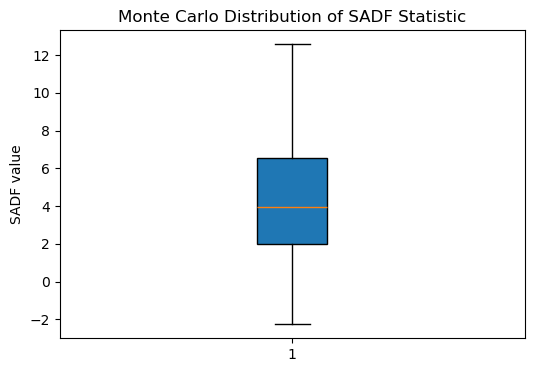

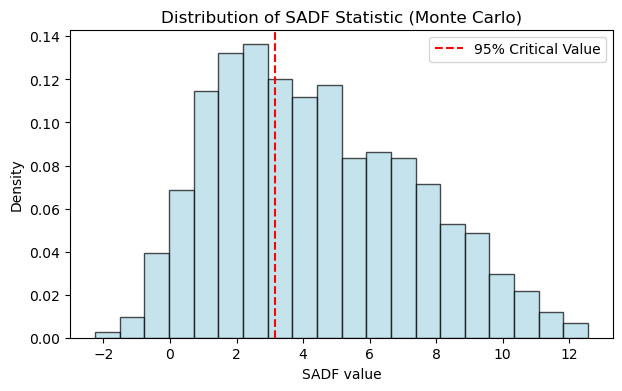

Empirical power at this setting: 0.602


In [21]:
coint_frac = 0.4
B = 1000
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
# crit_val_95 = 3.447352
# crit_val_99 =  4.162946
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_list = []
B = 1000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)
# print("Multipliers:", multipliers)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

# Distribution plot (histogram) with critical value
plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

In [11]:
# 2 

Running Simulations: |██████████████████████████████| 100% --- 1000/1000

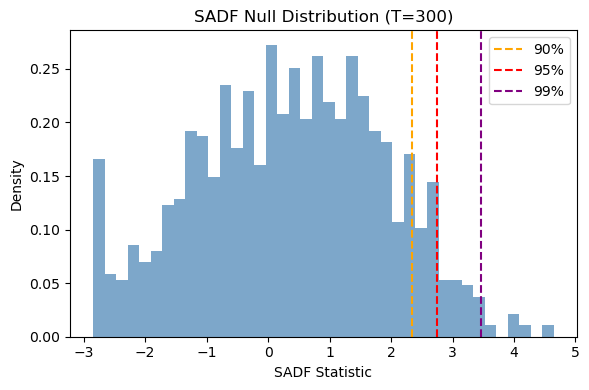

     Critical Value
90%        2.342510
95%        2.746993
99%        3.464298


Running Simulations: |██████████████████████████████| 100% --- 1000/1000Mean SADF: 3.058
Median SADF: 2.793
Min SADF: -2.845
Max SADF: 11.49
Standard deviation: 2.682
25th percentile: 1.062
75th percentile: 5.029
95th percentile: 7.48
99th percentile: 9.211


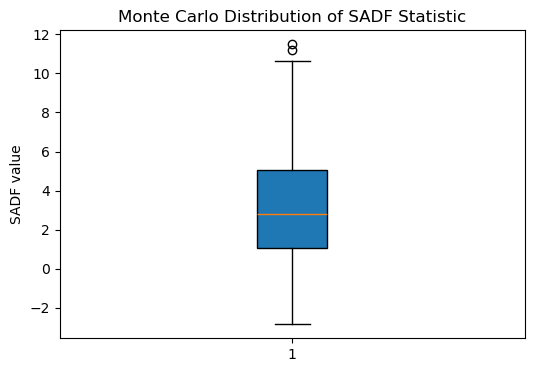

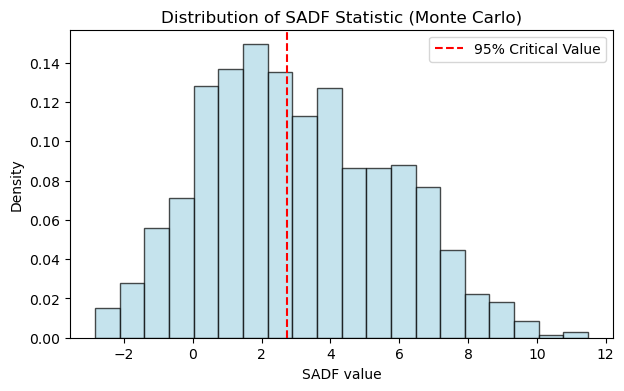

Empirical power at this setting: 0.504


In [25]:
coint_frac = 0.6
# innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
# crit_val_95 =  2.660850
# crit_val_99 =  3.437243
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")
""" Run Experiment """
sadf_list = []
for i in range(1000):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    #e = np.random.normal(0, 1, size=(300, 2))
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, 1000)
sadf_array = np.array(sadf_list)

print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

# Distribution plot (histogram) with critical value
plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

In [13]:
# 3



Running Simulations: |██████████████████████████████| 100% --- 1000/1000Mean SADF: 4.743
Median SADF: 4.738
Min SADF: 3.018
Max SADF: 6.294
Standard deviation: 0.485
25th percentile: 4.418
75th percentile: 5.049
95th percentile: 5.545
99th percentile: 5.903


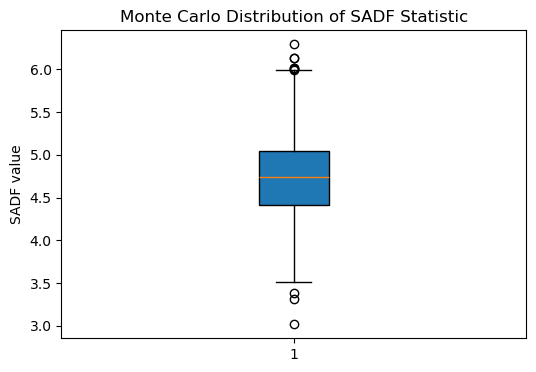

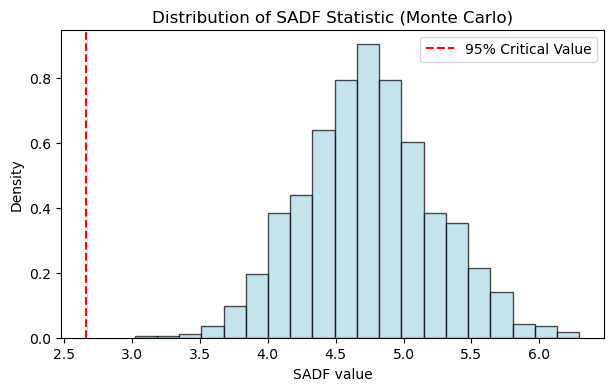

Empirical power at this setting: 1.0


In [54]:
coint_frac = 0.8
# innov = innov_6
# crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
# print(crit_val)
crit_val_95 =  2.660850
crit_val_99 =  2.444137

print("\n")
""" Run Experiment """
sadf_list = []
for i in range(1000):
    innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    e = np.random.normal(0, 1, size=(300, 2))
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, 1000)
sadf_array = np.array(sadf_list)

print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

# Distribution plot (histogram) with critical value
plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

## N = 500

In [16]:
T = 500
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [17]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [18]:
# 34

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

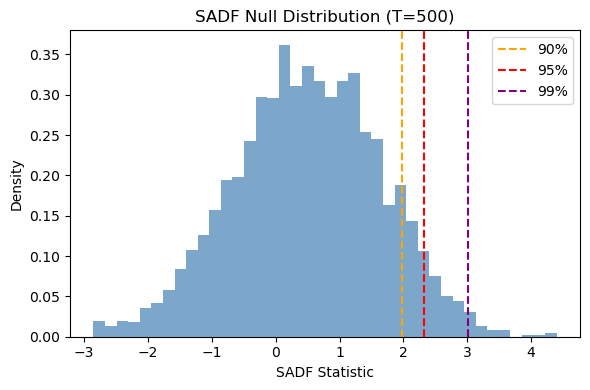

     Critical Value
90%        1.983055
95%        2.327813
99%        3.018464


beta =  [0.5760246]
alpha =  0.0027
ADF on residuals  stat = -12.145


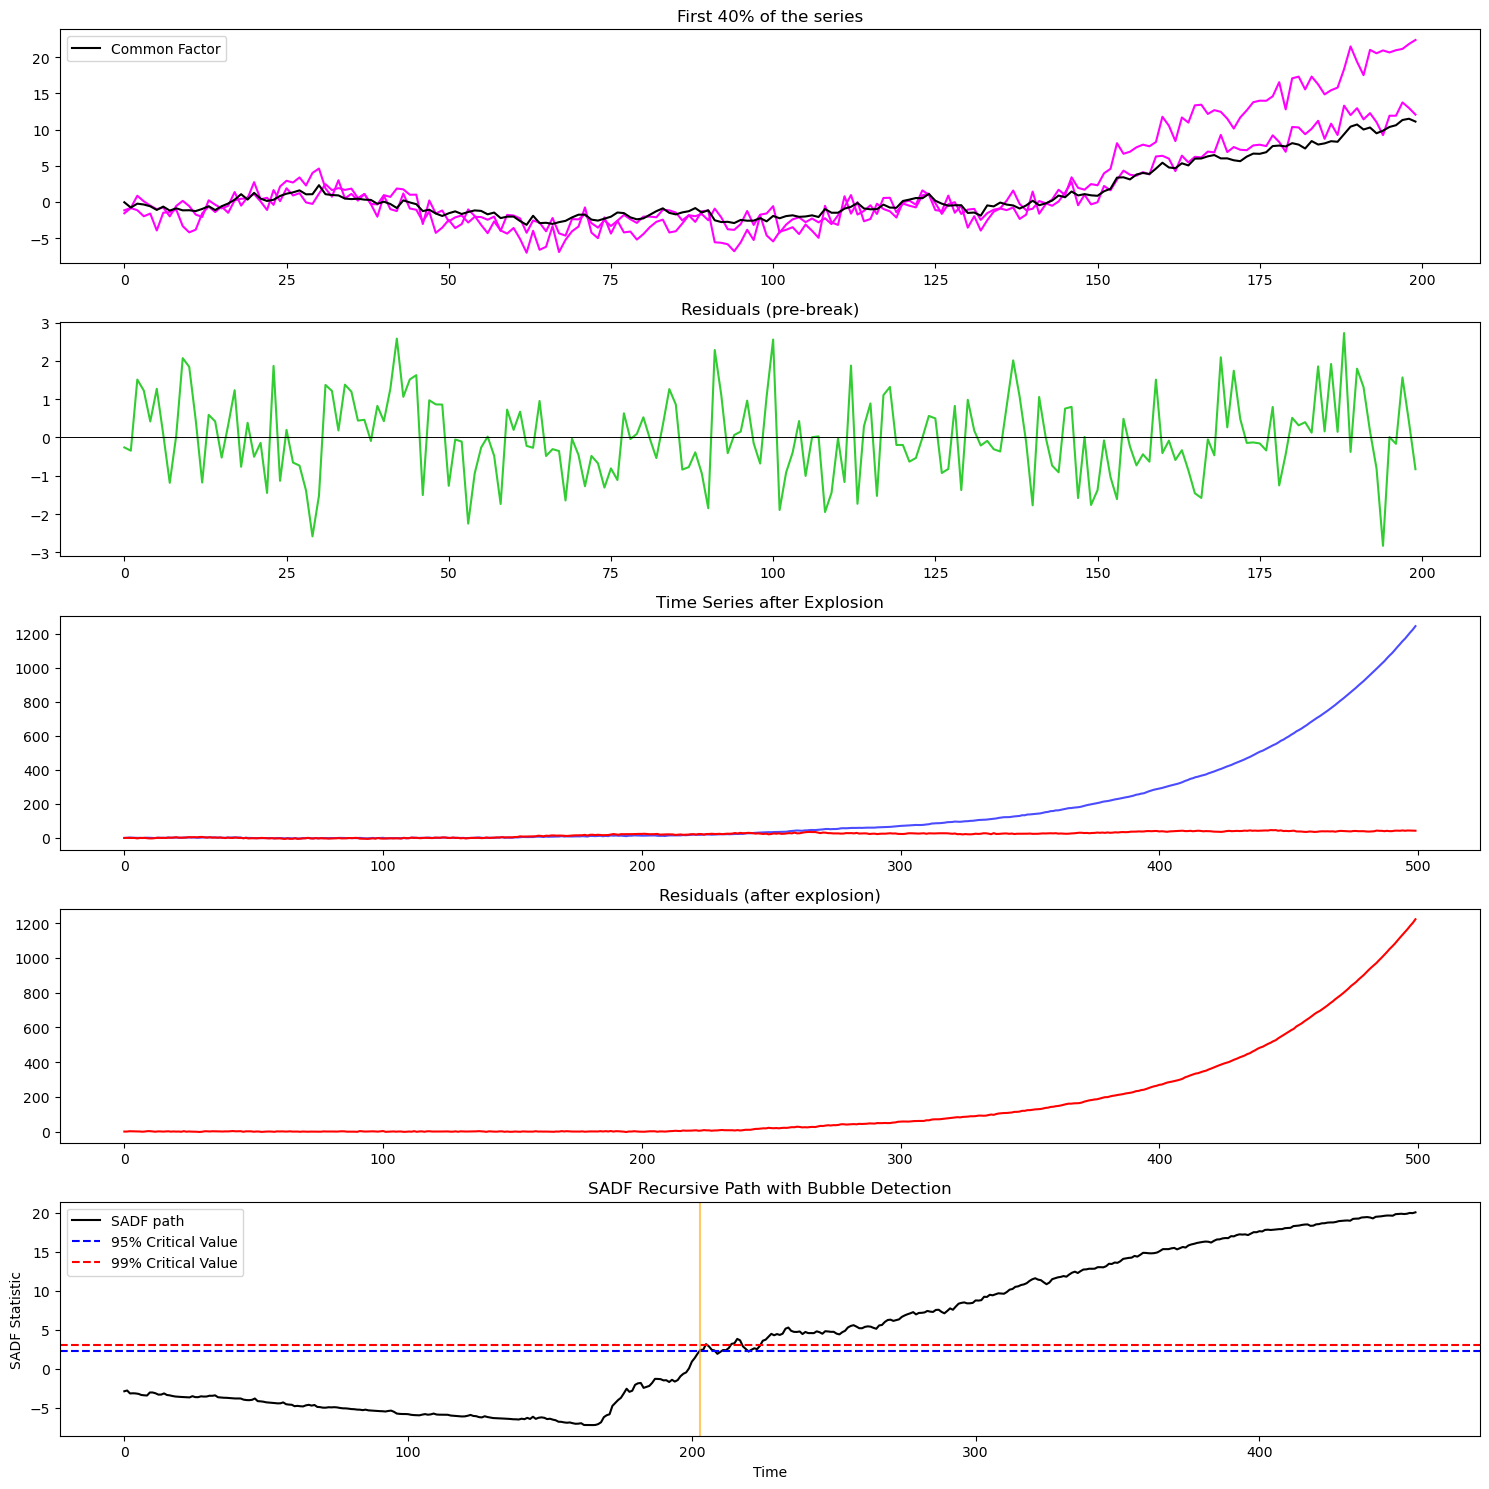

Time series is Explosive. SADF Value is: 20.05

Bubble starts at t=203
Multipliers: [1.2 2. ]


In [19]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [20]:
# 35

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

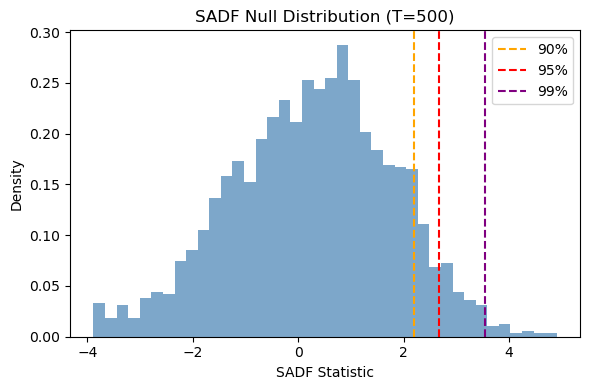

     Critical Value
90%        2.201141
95%        2.681327
99%        3.548030


beta =  [0.59700412]
alpha =  0.0074
ADF on residuals  stat = -16.107


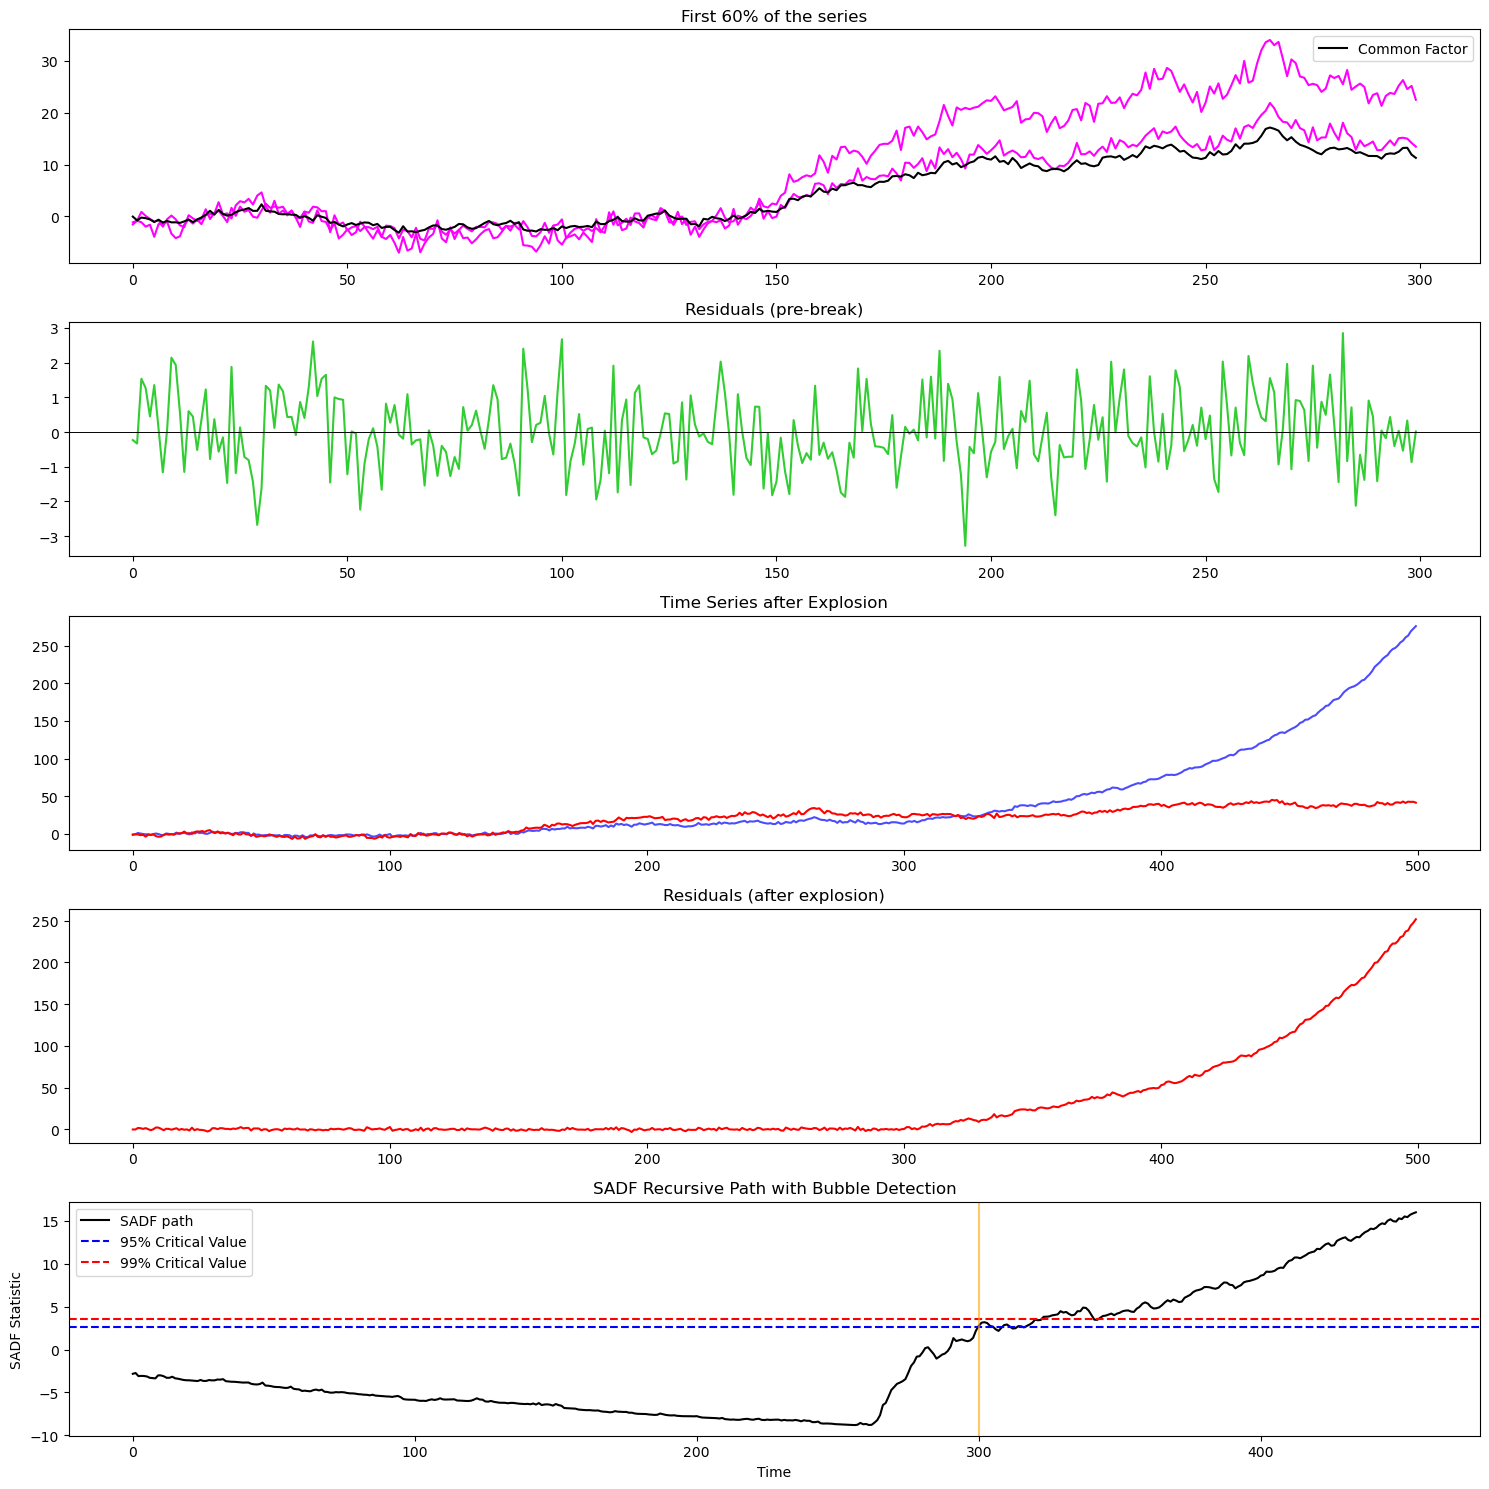

Time series is Explosive. SADF Value is: 16.0

Bubble starts at t=300
Multipliers: [1.2 2. ]


In [21]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [22]:
# 36

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

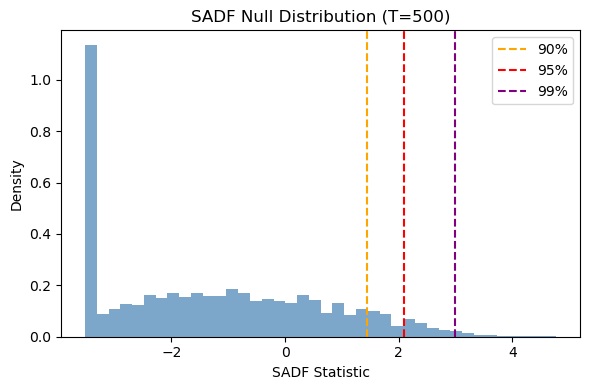

     Critical Value
90%        1.437682
95%        2.088312
99%        2.989527


beta =  [0.59679203]
alpha =  0.0164
ADF on residuals  stat = -20.142


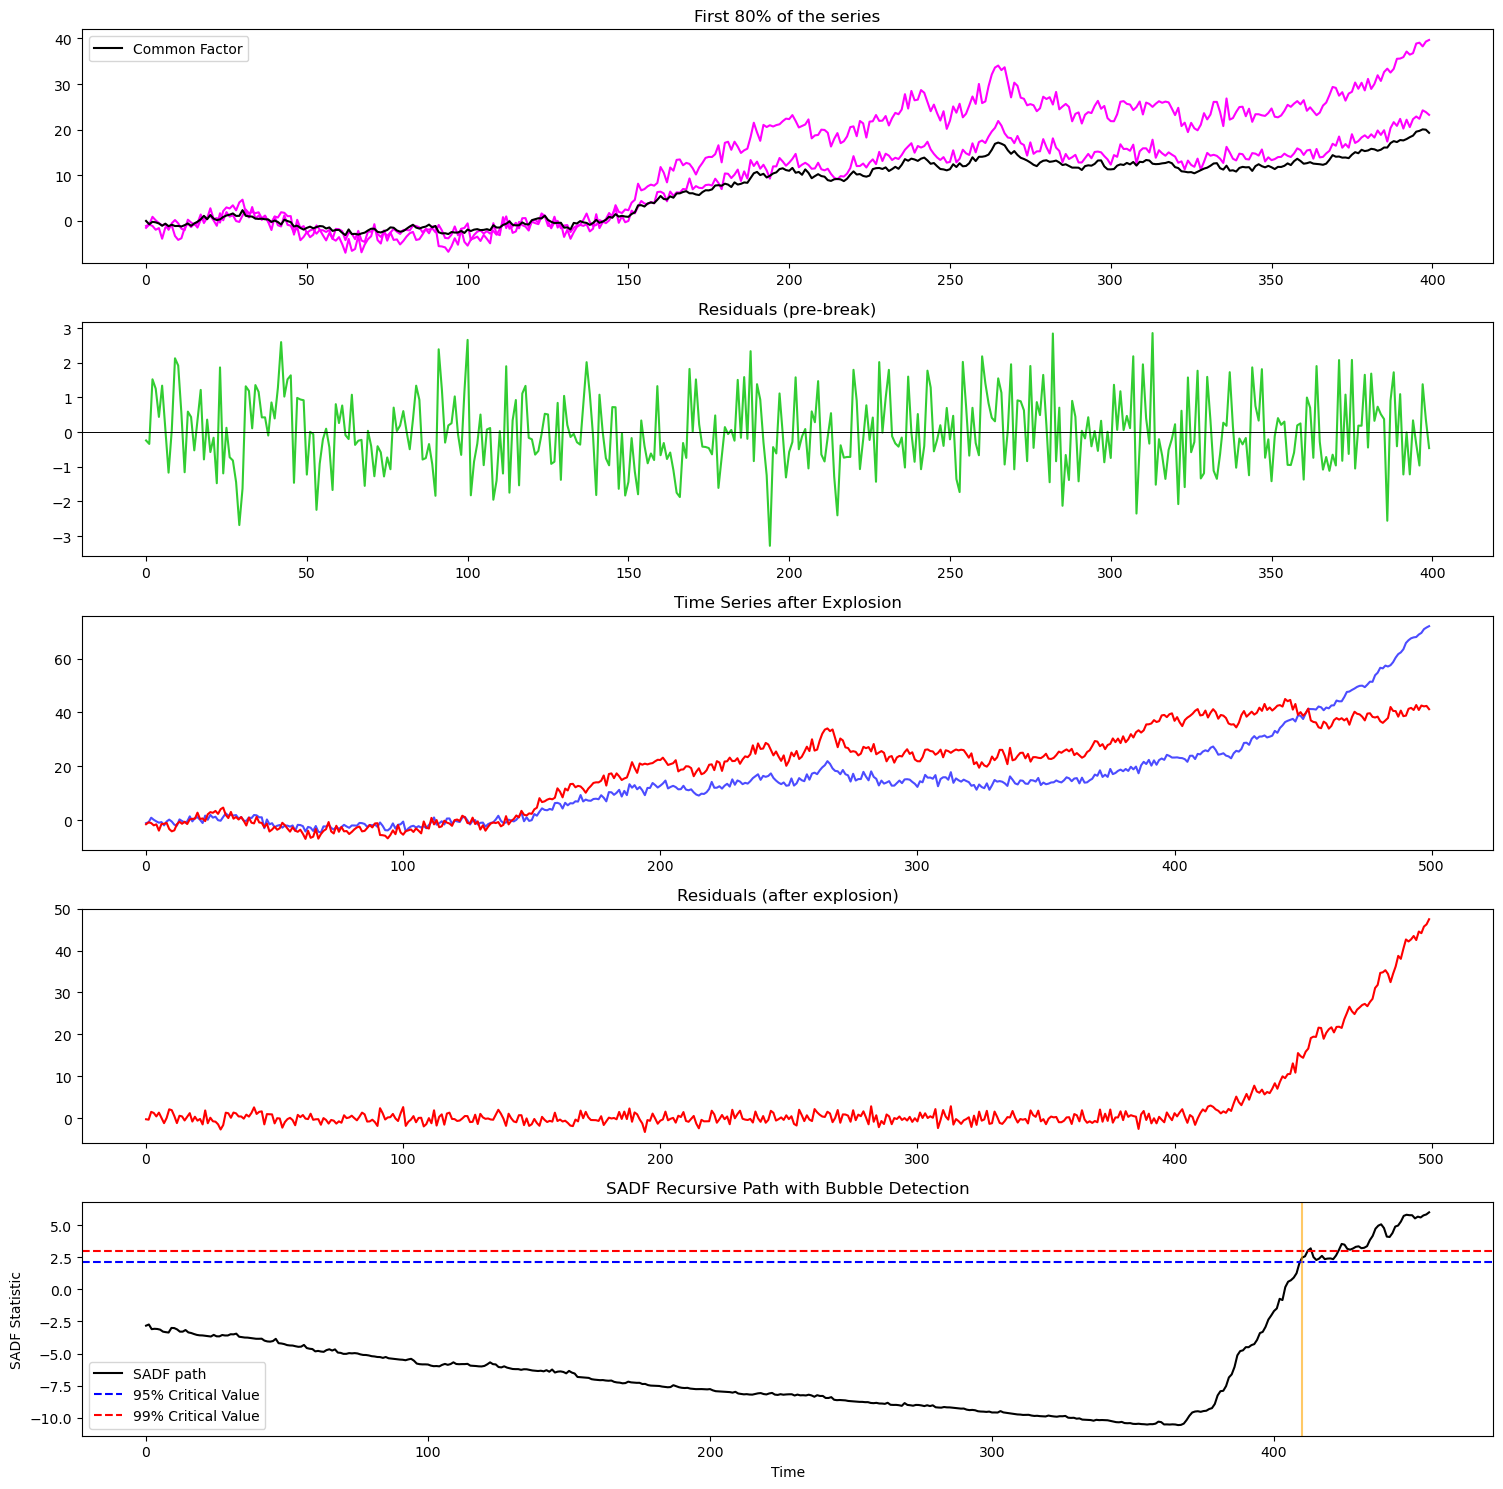

Time series is Explosive. SADF Value is: 5.99

Bubble starts at t=410
Multipliers: [1.2 2. ]


In [23]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 800

In [25]:
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [26]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [27]:
# 67

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

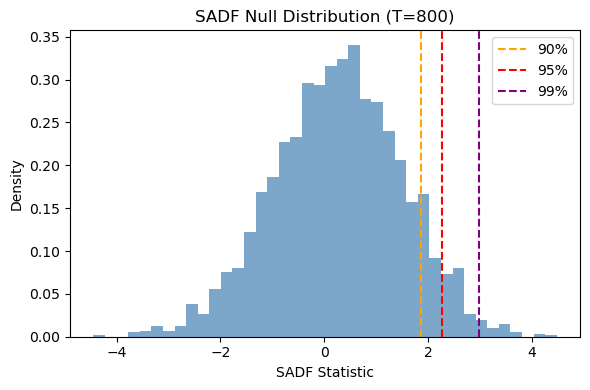

     Critical Value
90%        1.864144
95%        2.273140
99%        2.979095


beta =  [0.59753031]
alpha =  0.0095
ADF on residuals  stat = -17.114


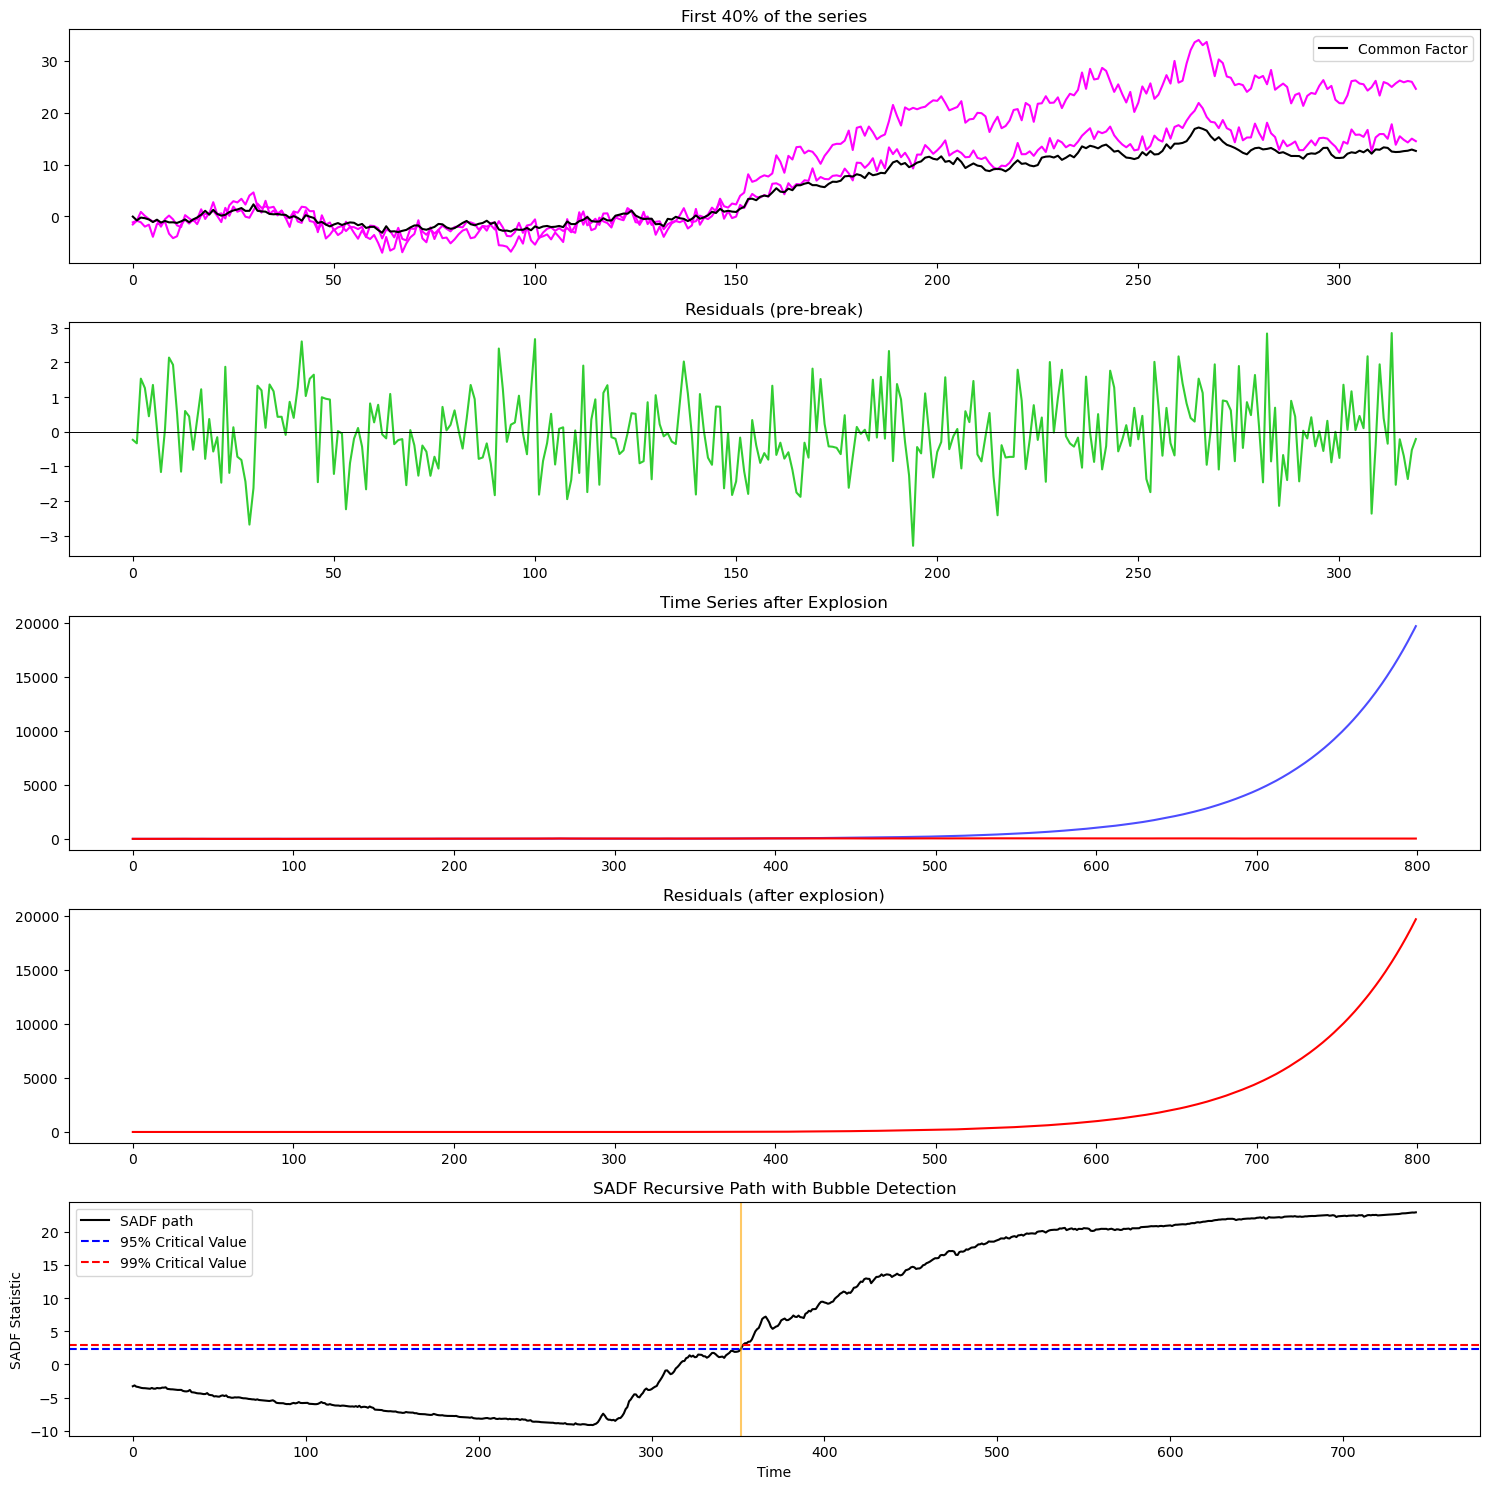

Time series is Explosive. SADF Value is: 22.91

Bubble starts at t=352
Multipliers: [1.2 2. ]


In [28]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [29]:
# 68

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

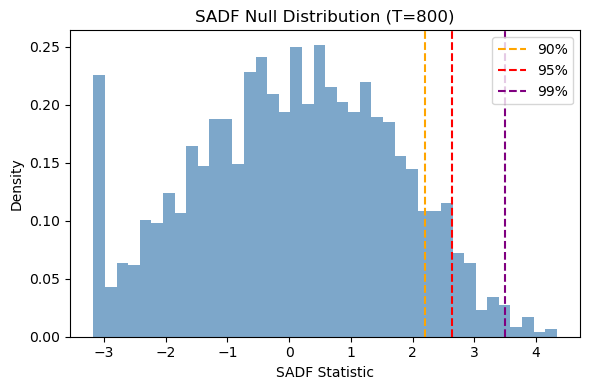

     Critical Value
90%        2.192910
95%        2.636637
99%        3.501538


beta =  [0.59776338]
alpha =  0.0104
ADF on residuals  stat = -22.453


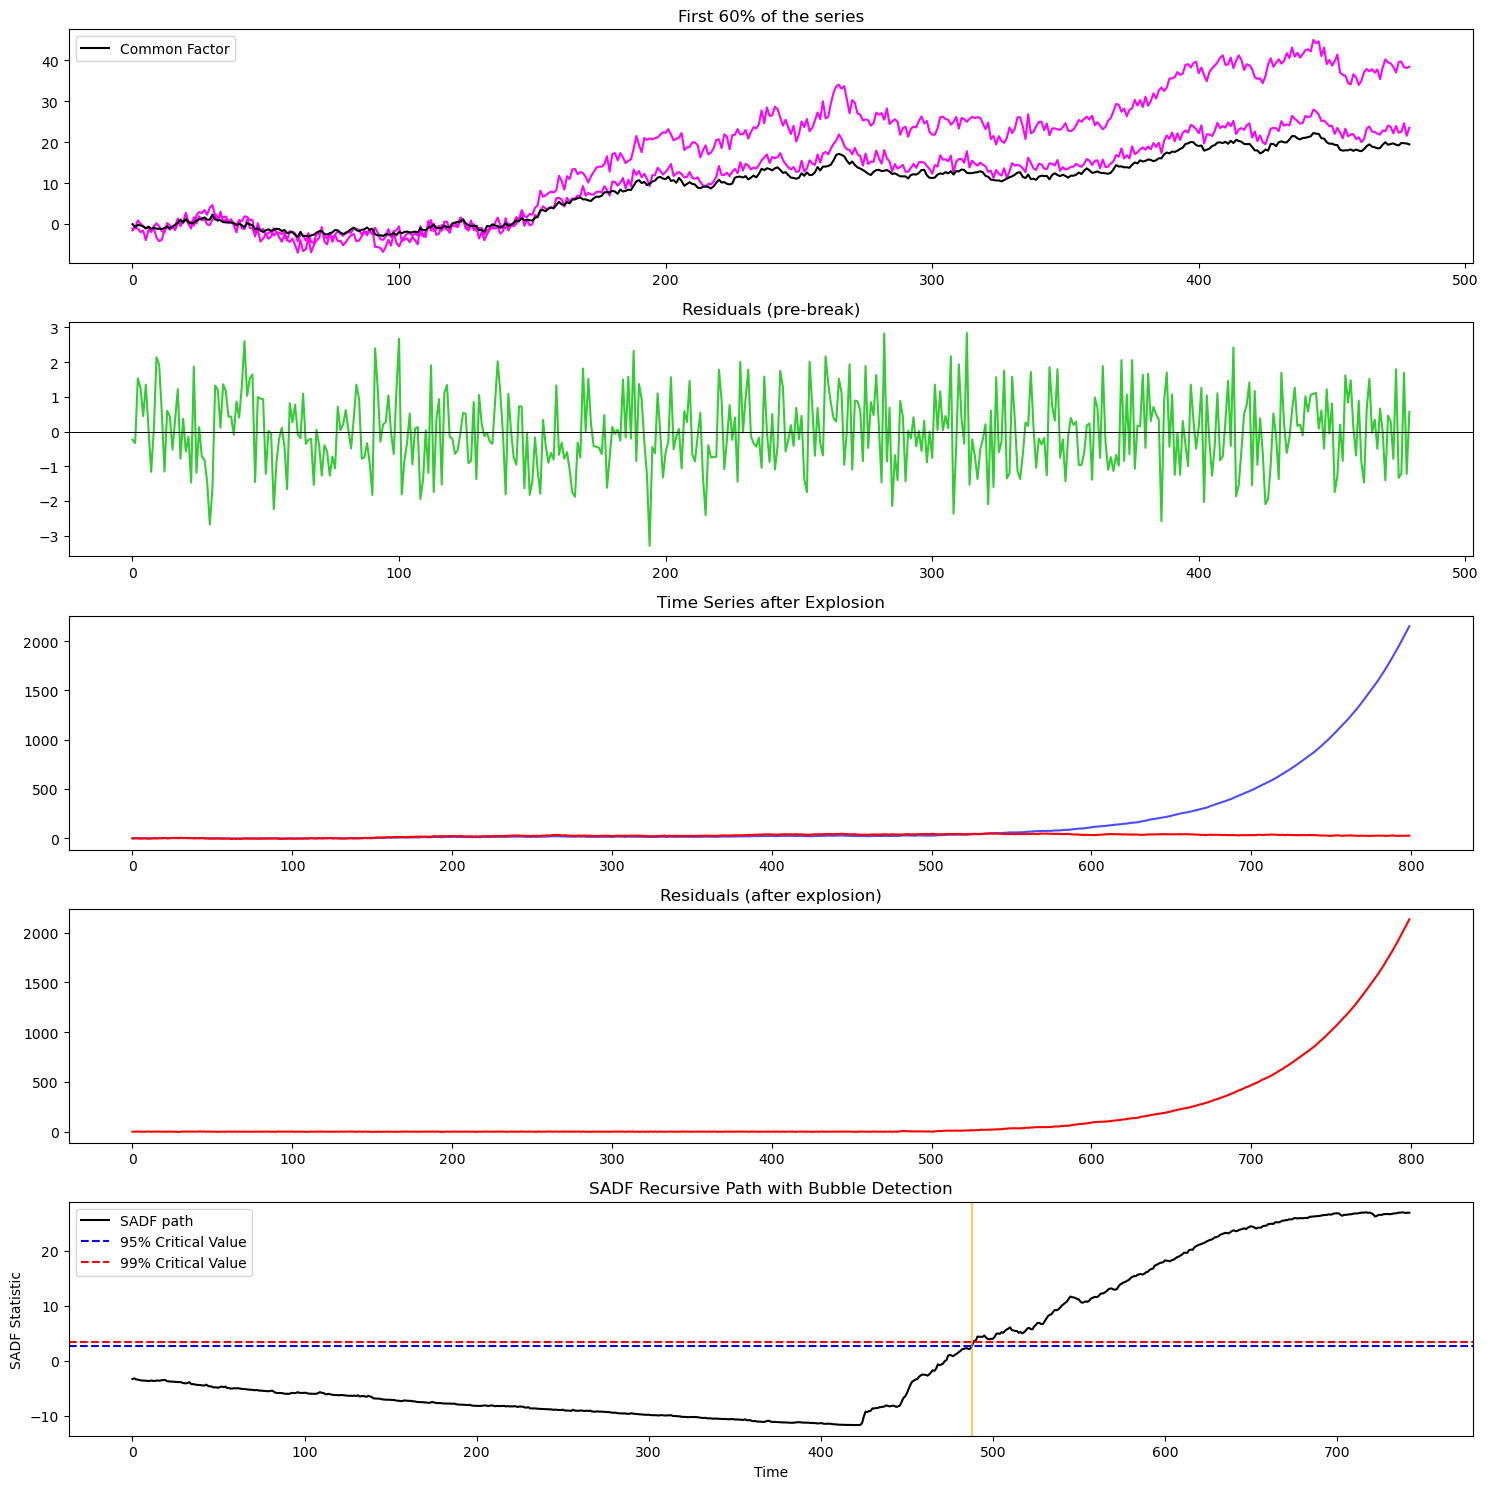

Time series is Explosive. SADF Value is: 26.97

Bubble starts at t=488
Multipliers: [1.2 2. ]


In [30]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [31]:
# 69

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

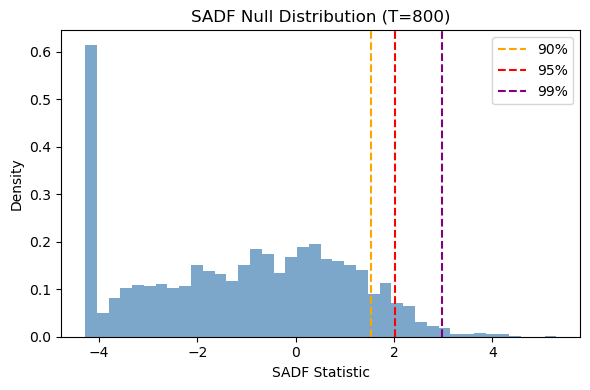

     Critical Value
90%        1.533968
95%        2.027327
99%        2.969848


beta =  [0.59854625]
alpha =  0.01
ADF on residuals  stat = -26.201


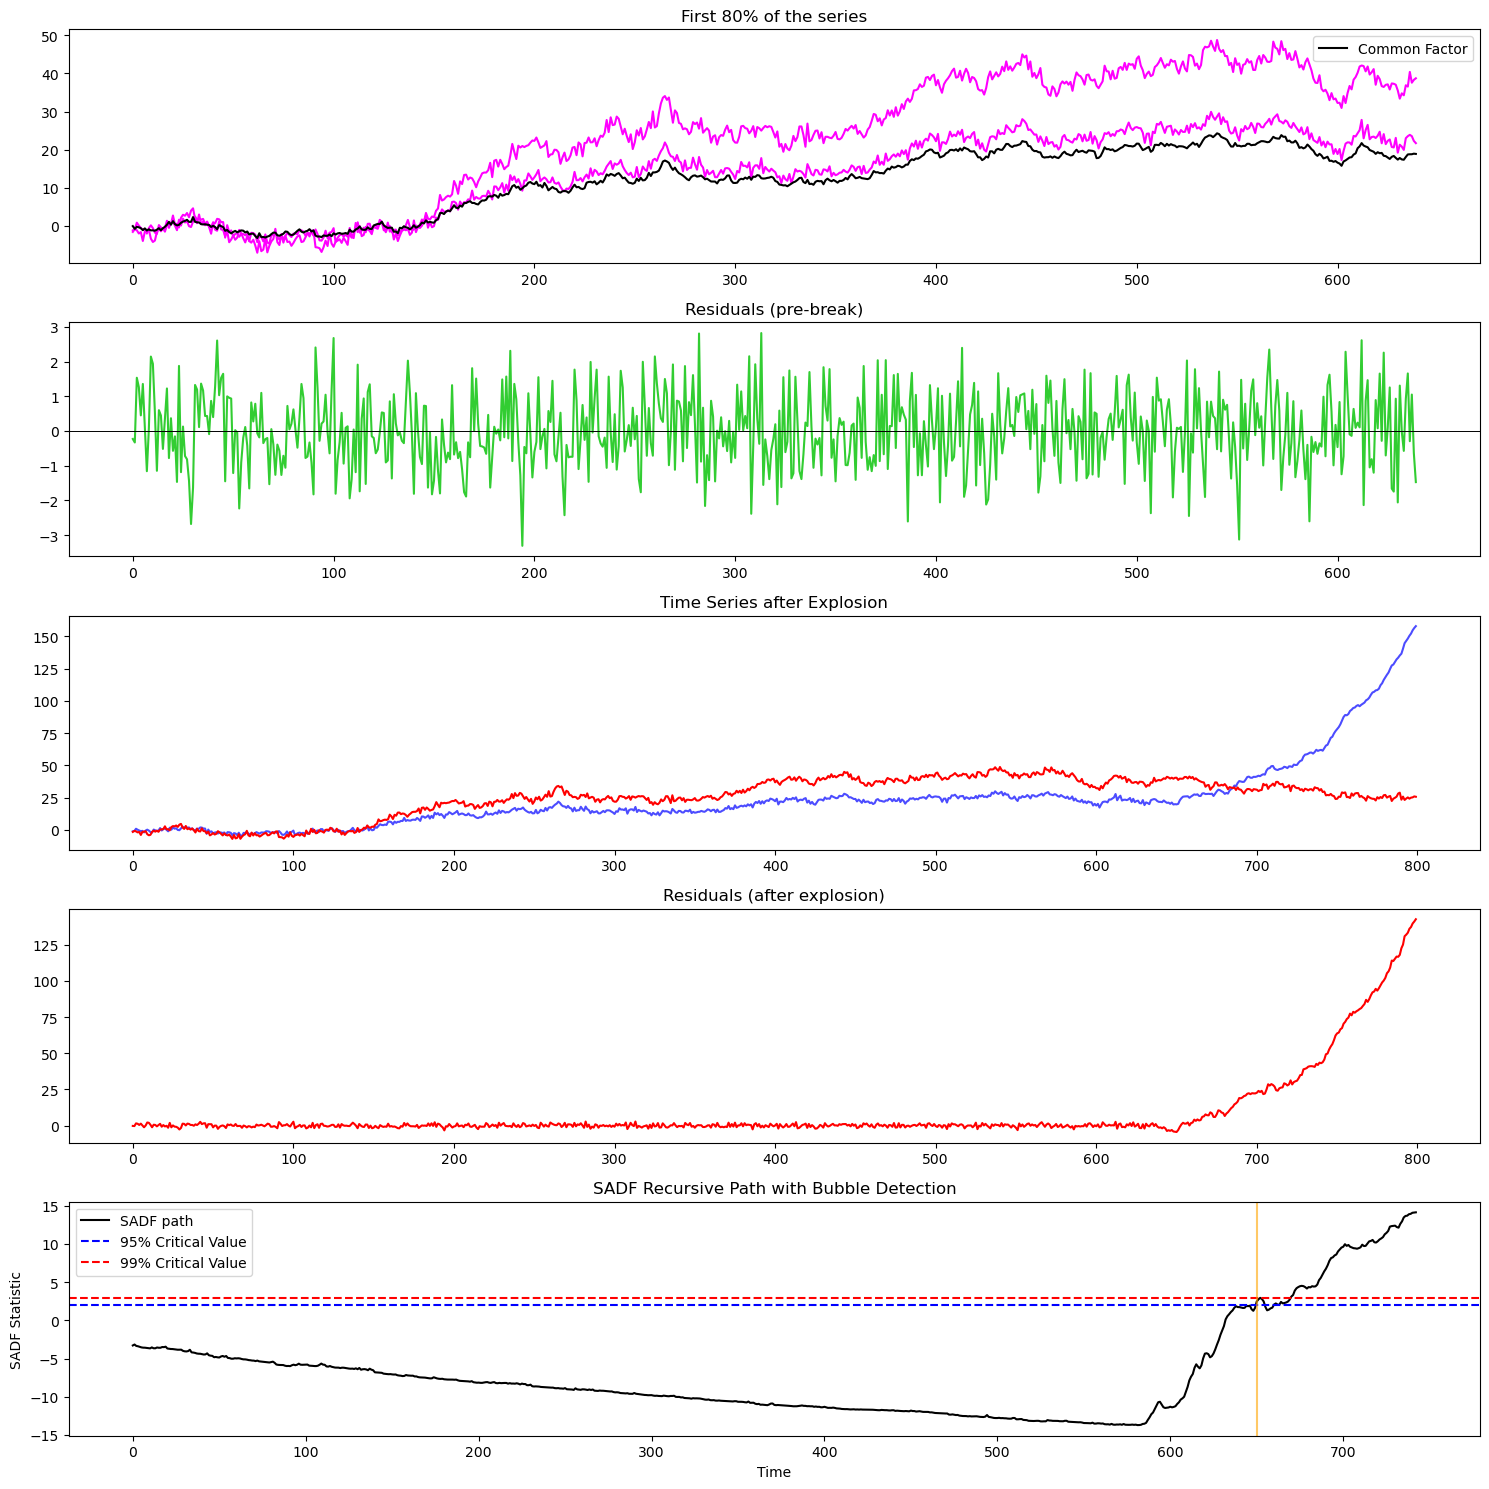

Time series is Explosive. SADF Value is: 14.12

Bubble starts at t=650
Multipliers: [1.2 2. ]


In [32]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

## N = 1000

In [34]:
T = 1000
e = eps[:T,:].copy()
common_fac = z[:T].copy()

In [35]:
coint_frac = 0.4
innov_4 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.6
innov_6 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
coint_frac = 0.8
innov_8 = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

In [36]:
# 100

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

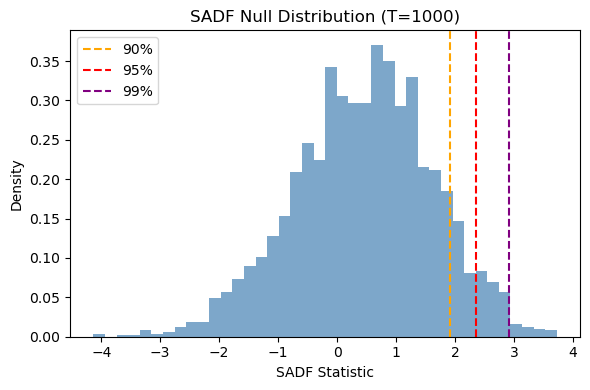

     Critical Value
90%        1.923103
95%        2.357107
99%        2.914761


beta =  [0.59679203]
alpha =  0.0164
ADF on residuals  stat = -20.142


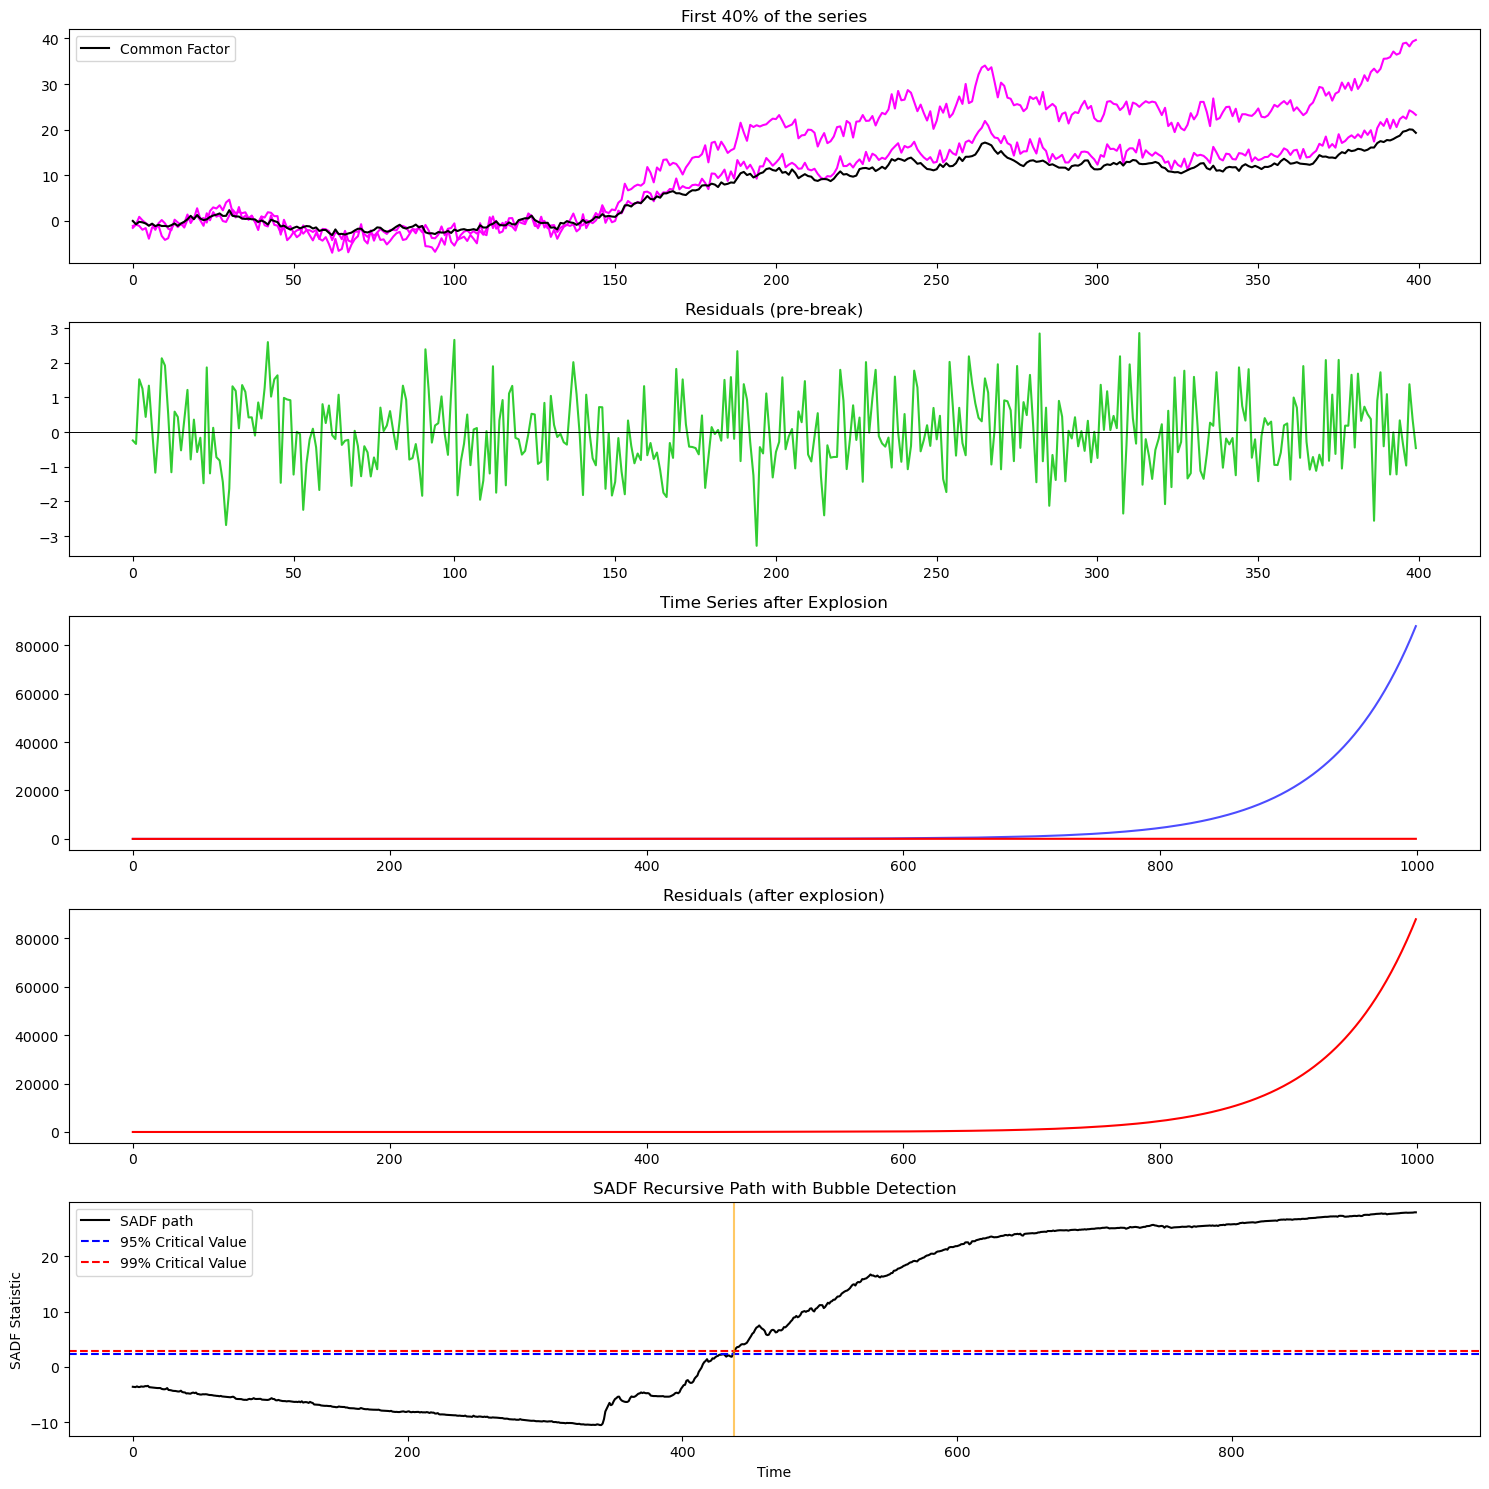

Time series is Explosive. SADF Value is: 27.97

Bubble starts at t=438
Multipliers: [1.2 2. ]


In [37]:
coint_frac = 0.4
innov = innov_4
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [38]:
# 101

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

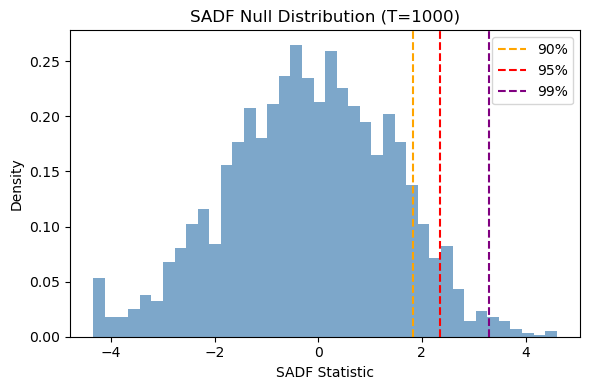

     Critical Value
90%        1.820500
95%        2.341862
99%        3.291242


beta =  [0.5981736]
alpha =  0.0104
ADF on residuals  stat = -24.950


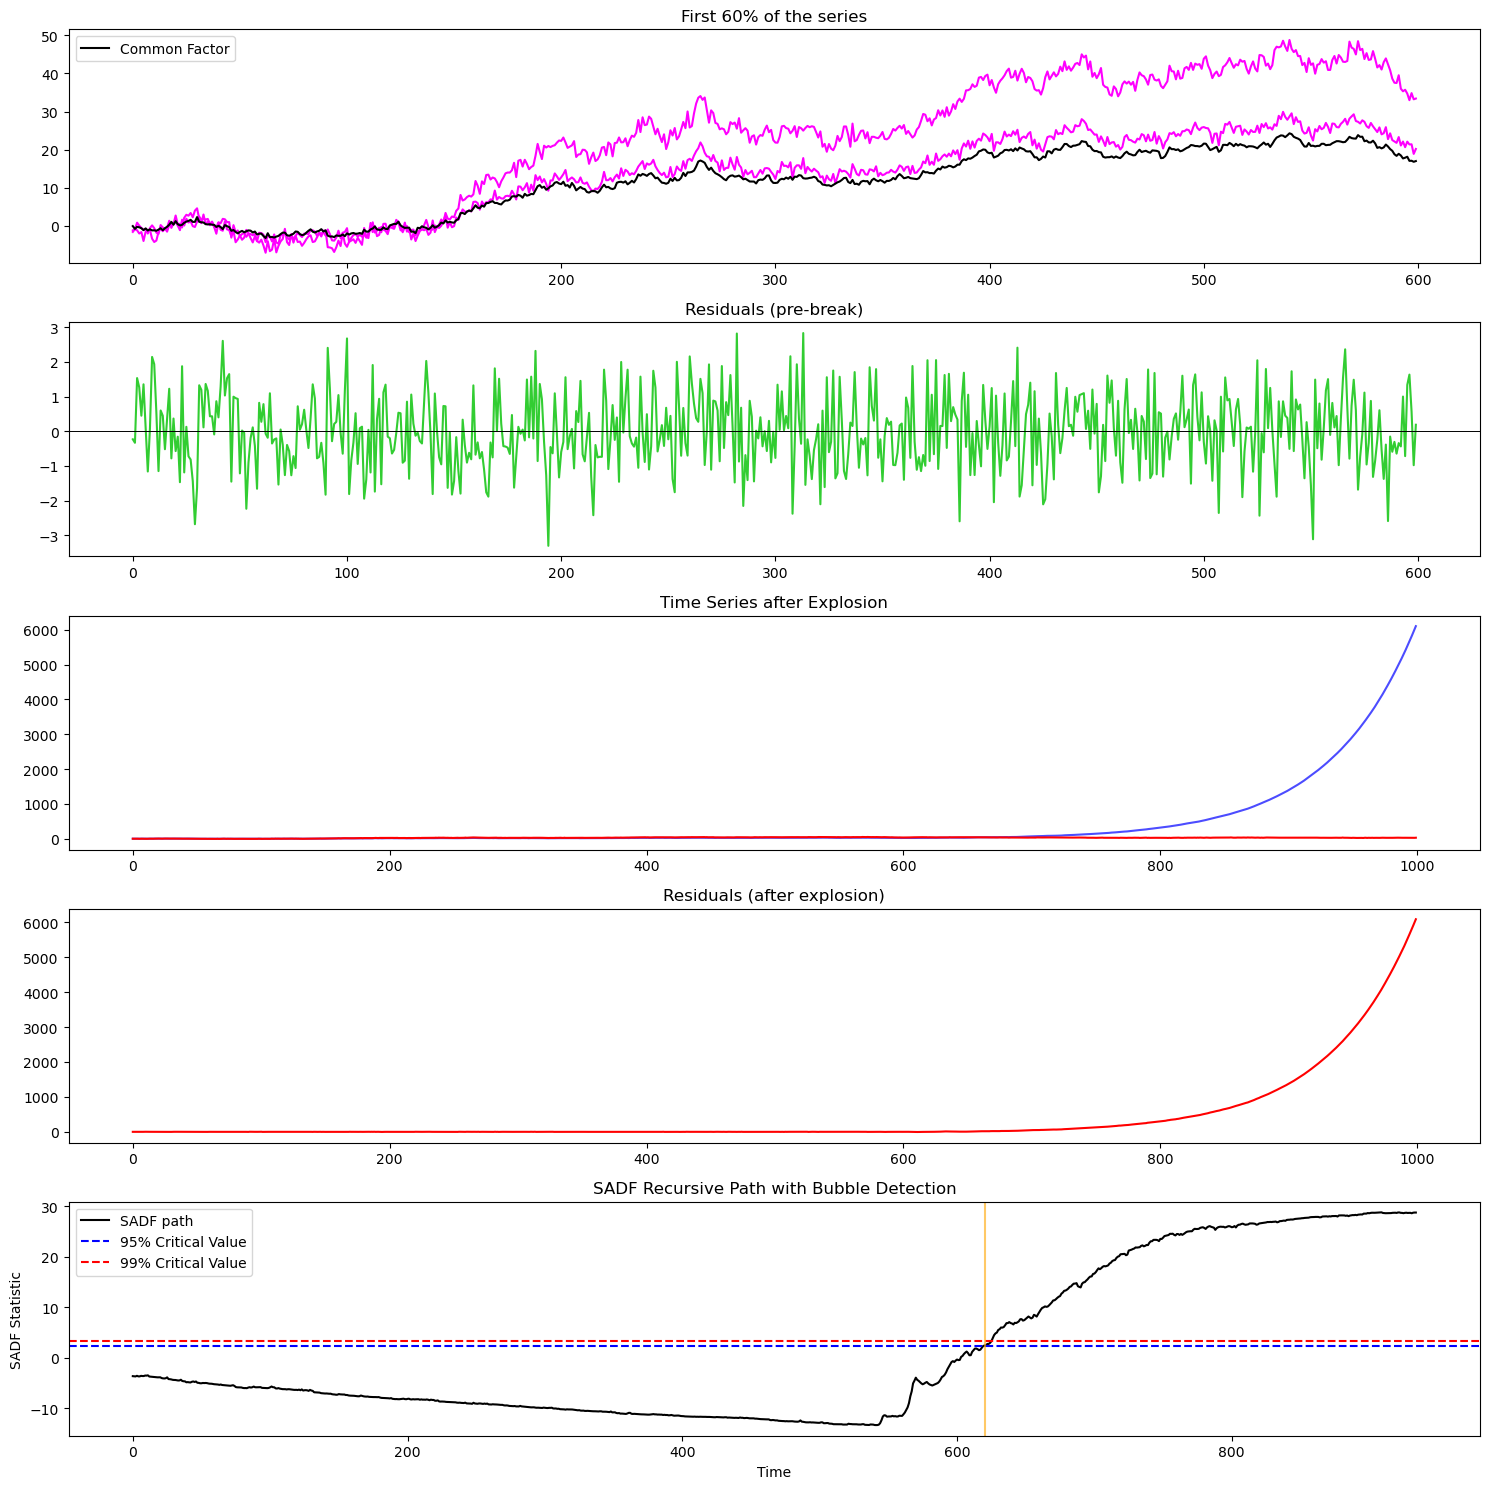

Time series is Explosive. SADF Value is: 28.82

Bubble starts at t=620
Multipliers: [1.2 2. ]


In [39]:
coint_frac = 0.6
innov = innov_6
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [40]:
# 102

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

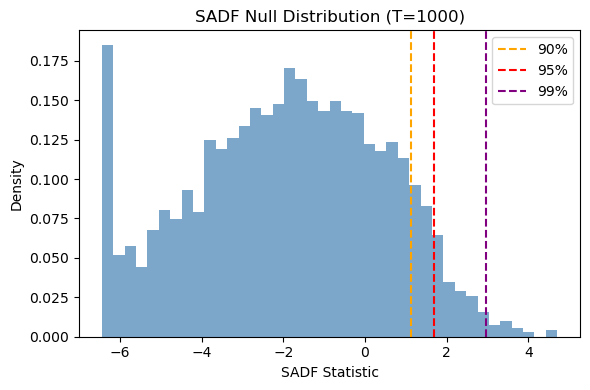

     Critical Value
90%        1.128291
95%        1.683440
99%        2.959351


beta =  [0.59860865]
alpha =  0.0062
ADF on residuals  stat = -29.065


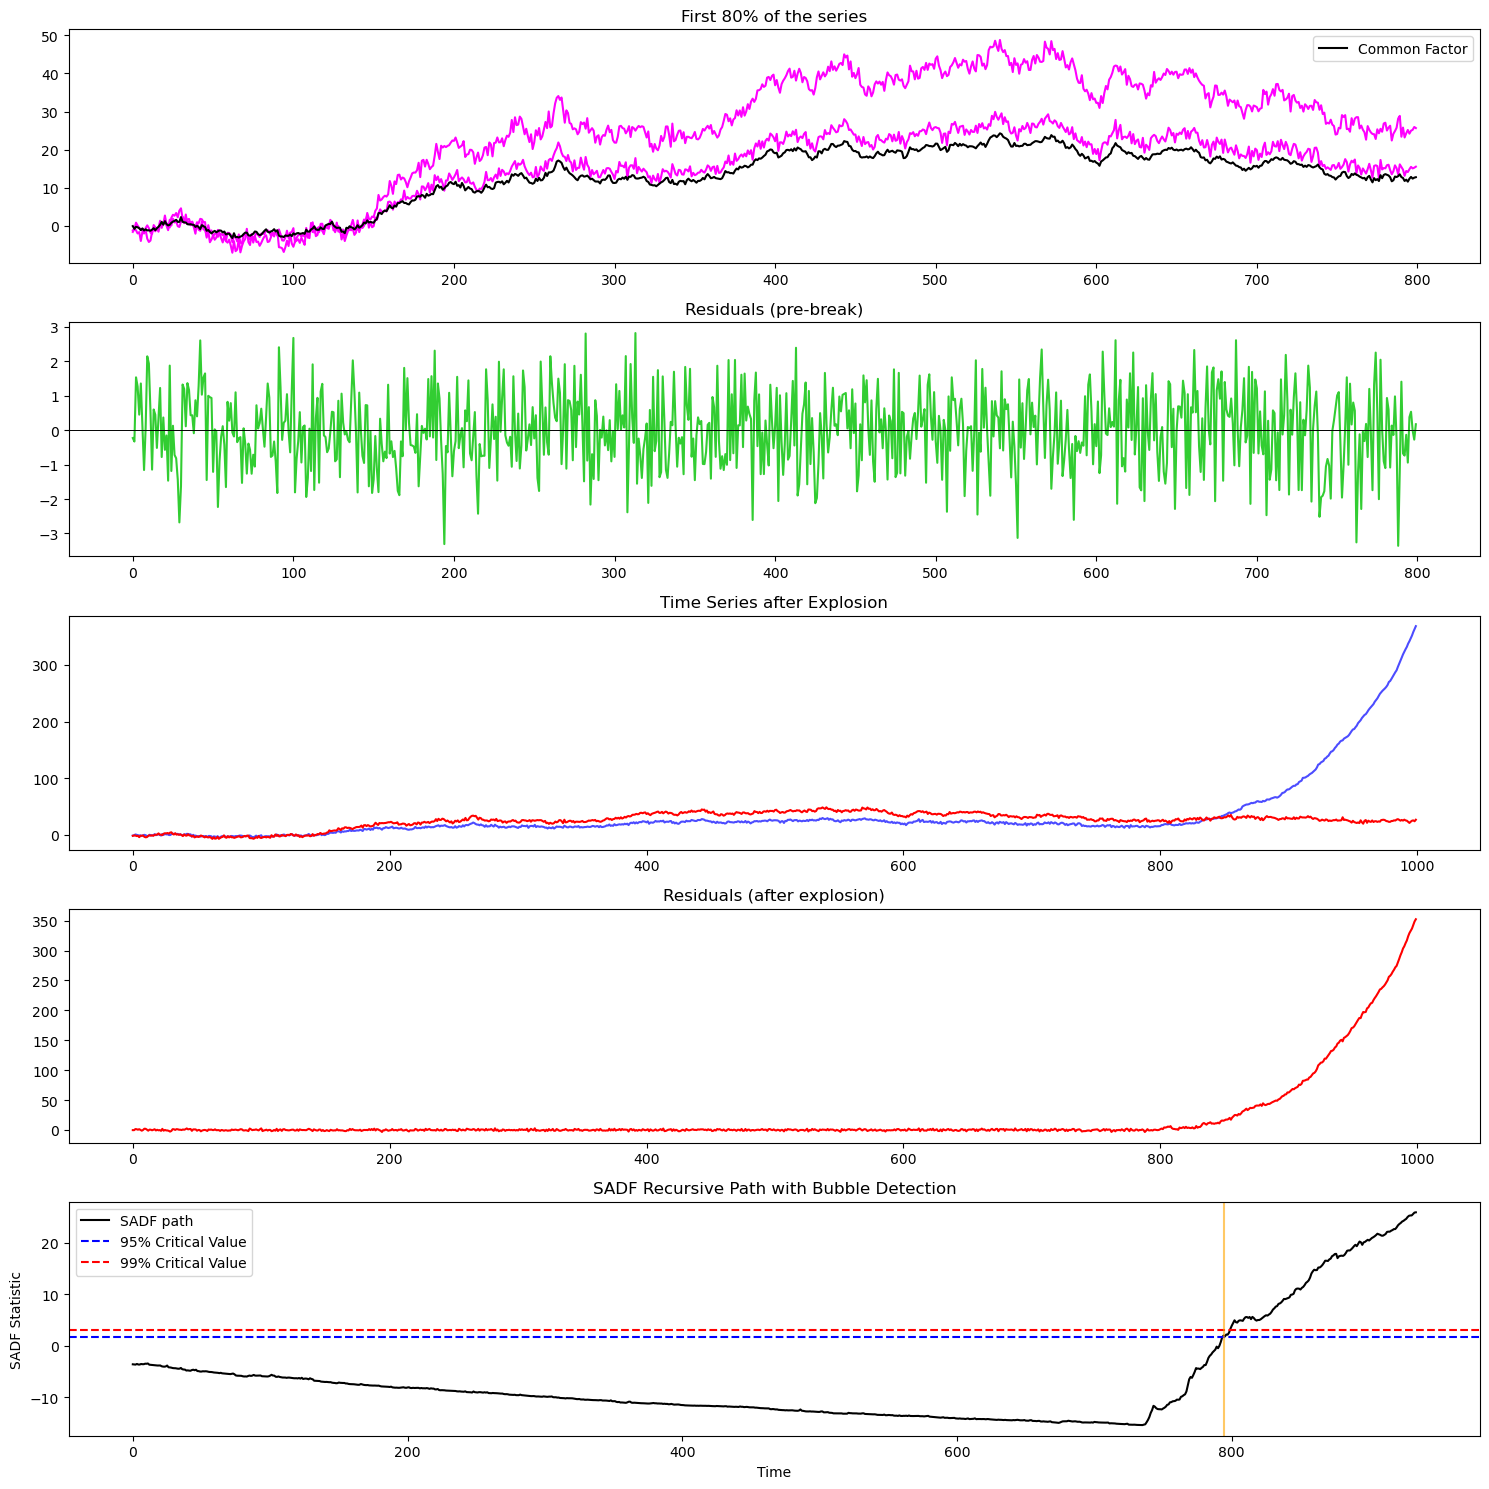

Time series is Explosive. SADF Value is: 25.92

Bubble starts at t=794
Multipliers: [1.2 2. ]


In [41]:
coint_frac = 0.8
innov = innov_8
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers)
print(crit_val)
crit_val_95 = np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 = np.round(crit_val.loc["99%", "Critical Value"],3)

print("\n")

""" Run Experiment """
sadf_val = mf.run_sadf_bubble_check( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
print("Multipliers:", multipliers)

T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
SADF_list.append(sadf_val)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)

In [42]:

# Create the DataFrame and write to CSV
pd.DataFrame({
    'T': T_list,
    'num_series': num_series_list,
    'coint_frac': coint_frac_list,
    'num_of_rw': num_of_rw_list,
    'SADF': SADF_list,
    'crit_95': crit_95_list,
    'crit_99': crit_99_list
}).to_csv(str(num_series) + "_Series_Experiment.csv", index=False)

In [102]:
import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)